# What's the Weather Like ? 
### Erick Ignacio García Rodríguez

From the collected data and scatter plots, the following three conclusions were made.

1. As expected, the temperature tendency works as a negative parabola, showing cold temperatures in both extremes and hotter temperatures in the cusp. 

2. The scatter points on the Temperature Vs Latitude graph are moved from the equator because of the inclination of the Earth with respect to the Sun. Thus, if the study is tested on another season of the year, the points will move with respect to the equator line.

3. Of the four plots generated, the only one that represents a trend is the Temperature vs Latitude. It is not possible to establish a conclusion that stands true everytime for the other 3 plots.

In [13]:
import matplotlib.pyplot as plt
import openweathermapy as owm
import pandas as pd
import numpy as np
import requests
import random
from datetime import date

from config import api_key
from citipy import citipy

In [2]:
weather_url = "http://api.openweathermap.org/data/2.5/weather?"

lat_range = (-90, 90)
lng_range = (-180, 180)

In [3]:
# settings to make the API calls
settings = {"units" : "imperial", "appid" : api_key}

# information to obtain from API
summary = ['coord.lat', 'main.temp', 'main.humidity', 'clouds.all', 'wind.speed']

In [4]:
city_dic = {}

i = 0

while i <= 500:
    lat = round(random.uniform(-90, 90), 7)
    lon = round(random.uniform(-180, 180), 7)
    city = citipy.nearest_city(lat, lon)
    
    if city.city_name not in city_dic:
        try:
            current_weather = owm.get_current(city.city_name, **settings)
            city_dic[city.city_name] = current_weather(*summary)
            print(f"City number {i+1} : {city.city_name}")
            i += 1
        except:
            print("\tCity not found")

City number 1 : mataura
City number 2 : avarua
City number 3 : kavaratti
City number 4 : srivardhan
City number 5 : albany
City number 6 : barcelos
	City not found
City number 7 : punta arenas
City number 8 : cape town
City number 9 : mahibadhoo
City number 10 : deputatskiy
City number 11 : vaini
City number 12 : mahebourg
City number 13 : tiksi
City number 14 : college
City number 15 : port alfred
City number 16 : kruisfontein
City number 17 : arraial do cabo
City number 18 : iqaluit
City number 19 : saldanha
City number 20 : hobart
City number 21 : bluff
City number 22 : salalah
City number 23 : westport
City number 24 : merrill
City number 25 : harrison
City number 26 : jamestown
City number 27 : palmer
City number 28 : tarnogskiy gorodok
City number 29 : uda
City number 30 : kenai
City number 31 : juruti
	City not found
	City not found
	City not found
City number 32 : ushuaia
	City not found
City number 33 : ancud
City number 34 : barrow
City number 35 : touros
City number 36 : atu

City number 275 : kahului
City number 276 : vila franca do campo
	City not found
City number 277 : fort nelson
City number 278 : lubao
City number 279 : constitucion
City number 280 : kutum
City number 281 : rio grande
	City not found
City number 282 : humaita
	City not found
City number 283 : imbituba
City number 284 : cayenne
City number 285 : irbit
City number 286 : longyearbyen
	City not found
City number 287 : roblin
City number 288 : kodiak
City number 289 : lavrentiya
City number 290 : ballina
City number 291 : cap-aux-meules
City number 292 : kungurtug
City number 293 : balsas
City number 294 : odessa
	City not found
City number 295 : hammerfest
City number 296 : caravelas
City number 297 : aklavik
City number 298 : charcas
	City not found
	City not found
	City not found
City number 299 : lisala
	City not found
City number 300 : russell
City number 301 : takaka
City number 302 : awjilah
City number 303 : kiunga
	City not found
City number 304 : soissons
	City not found
City num

In [5]:
city_dic

{'mataura': (-46.19, 46, 97, 100, 1.01),
 'avarua': (-21.21, 66.2, 93, 100, 3.36),
 'kavaratti': (10.57, 83.03, 77, 80, 10.58),
 'srivardhan': (18.03, 80.51, 88, 74, 8.16),
 'albany': (42.65, 79.43, 48, 75, 6.93),
 'barcelos': (-0.97, 89.33, 53, 36, 5.35),
 'punta arenas': (-53.16, 41, 93, 75, 10.29),
 'cape town': (-33.93, 56.44, 93, 0, 3.36),
 'mahibadhoo': (3.78, 83.75, 75, 58, 7.43),
 'deputatskiy': (69.3, 48.29, 93, 100, 2.77),
 'vaini': (15.34, 77.45, 89, 69, 2.08),
 'mahebourg': (-20.41, 69.44, 56, 75, 8.05),
 'tiksi': (71.64, 48.47, 62, 96, 9.35),
 'college': (64.86, 60.53, 93, 75, 3.36),
 'port alfred': (-33.59, 57.99, 89, 0, 1.99),
 'kruisfontein': (-34, 51.17, 91, 0, 2.28),
 'arraial do cabo': (-22.97, 77.65, 50, 0, 6.93),
 'iqaluit': (63.75, 55.18, 71, 75, 5.82),
 'saldanha': (41.42, 72.95, 58, 28, 18.81),
 'hobart': (-42.88, 42.39, 95, 20, 11.41),
 'bluff': (-23.58, 51.71, 66, 59, 8.63),
 'salalah': (17.01, 80.6, 94, 90, 8.05),
 'westport': (41.14, 82.04, 54, 40, 12.75),
 

In [6]:
city_df = pd.DataFrame.from_dict(city_dic, orient='index')
city_df = city_df.rename(columns={0 : 'Latitude', 1 : 'Temperature', 2 : 'Humidity', 3 : 'Cloudiness', 4 : 'Wind Speed'})
city_df.head()

,Latitude,Temperature,Humidity,Cloudiness,Wind Speed
mataura,-46.19,46.00,97,100,1.01
avarua,-21.21,66.20,93,100,3.36
kavaratti,10.57,83.03,77,80,10.58
srivardhan,18.03,80.51,88,74,8.16
albany,42.65,79.43,48,75,6.93


In [7]:
city_df.to_csv("csv/CityWeather.csv")

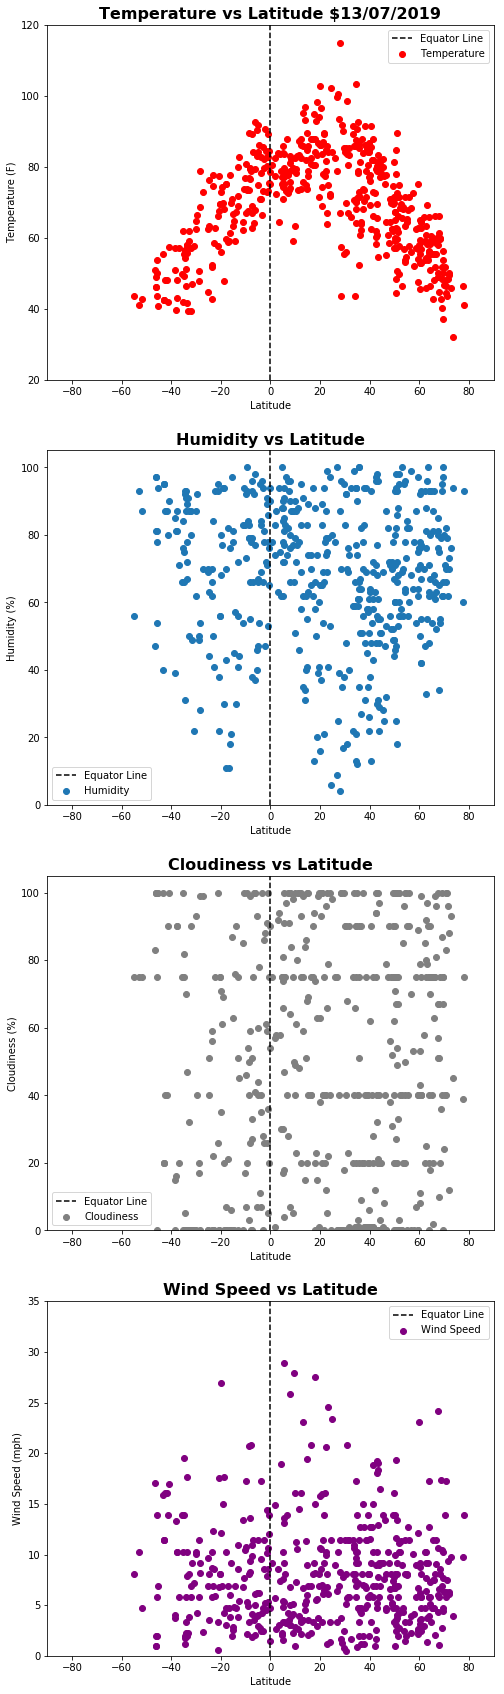

In [16]:
fig, (temp, hum, clo, wind) = plt.subplots(4, figsize=(8,30))
#fig.suptitle("Weather Analysis", fontsize=16, fontweight='bold')

today = date.today().strftime("%d/%m/%Y")

temp.scatter(city_df['Latitude'], city_df['Temperature'], color='red')
temp.set_ylabel("Temperature (F)")
temp.set_xlabel("Latitude")
temp.set_title(f"Temperature vs Latitude ${today}", fontsize = 16, fontweight = 'bold')
temp.set_xlim((-90,90))
temp.set_ylim((20, 120))
temp.axvline(0, color='black', ls="--", label='Equator Line')
temp.legend(loc='best')

hum.scatter(city_df['Latitude'], city_df['Humidity'])
hum.set_ylabel("Humidity (%)")
hum.set_xlabel("Latitude")
hum.set_title("Humidity vs Latitude", fontsize = 16, fontweight = 'bold')
hum.set_xlim((-90,90))
hum.set_ylim((0, 105))
hum.axvline(0, color='black', ls="--", label='Equator Line')
hum.legend(loc='lower left')

clo.scatter(city_df['Latitude'], city_df['Cloudiness'], color='grey')
clo.set_ylabel("Cloudiness (%)")
clo.set_xlabel("Latitude")
clo.set_title("Cloudiness vs Latitude", fontsize = 16, fontweight = 'bold')
clo.set_xlim((-90,90))
clo.set_ylim((0, 105))
clo.axvline(0, color='black', ls="--", label='Equator Line')
clo.legend(loc='lower left')

wind.scatter(city_df['Latitude'], city_df['Wind Speed'], color='purple')
wind.set_ylabel("Wind Speed (mph)")
wind.set_xlabel("Latitude")
wind.set_title("Wind Speed vs Latitude", fontsize = 16, fontweight = 'bold')
wind.set_xlim((-90,90))
wind.set_ylim((0, 35))
wind.axvline(0, color='black', ls="--", label='Equator Line')
wind.legend(loc='best')

plt.show()

In [9]:
fig.savefig("images/weatherCharts.png")

In [10]:
extentTemp = temp.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
fig.savefig('images/TempVSLat.png', bbox_inches=extentTemp.expanded(1.2, 1.2))
extentHum = hum.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
fig.savefig('images/HumVSLat.png', bbox_inches=extentHum.expanded(1.2, 1.2))
extentClo = clo.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
fig.savefig('images/CloVSLat.png', bbox_inches=extentClo.expanded(1.2, 1.2))
extentWind = wind.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
fig.savefig('images/WindVSLat.png', bbox_inches=extentWind.expanded(1.2, 1.2))